In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X,y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=8)
ridge = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)

print('MSE: %.3f' % (mean_squared_error(y_train, y_train_pred)))
print('R^2: %.3f' % (r2_score(y_train, y_train_pred)))

[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
MSE: 2865.170
R^2: 0.522


In [2]:
y_test_pred = ridge.predict(X_test)
print('MSE: %.3f' % (mean_squared_error(y_test, y_test_pred)))
print('R^2: %.3f' % (r2_score(y_test, y_test_pred)))

MSE: 3027.227
R^2: 0.473


In [3]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)

y_pred = lasso.predict(X_train)

print('MSE: %.3f' % (mean_squared_error(y_train, y_pred)))
print('R^2: %.3f' % (r2_score(y_train, y_pred)))

y_test_pred = lasso.predict(X_test)

print('MSE:%.3f' %(mean_squared_error(y_test, y_test_pred)))
print('R^2: %.3f' %(r2_score(y_test, y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE: 3818.201
R^2: 0.362
MSE:3646.836
R^2: 0.366


In [4]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train,y_train)
print(elanet.coef_)

y_pred = elanet.predict(X_train)

print('MSE: %.3f' % (mean_squared_error(y_train, y_pred)))
print('R^2: %.3f' % (r2_score(y_train, y_pred)))

y_test_pred = elanet.predict(X_test)

print('MSE:%.3f' %(mean_squared_error(y_test, y_test_pred)))
print('R^2: %.3f' %(r2_score(y_test, y_test_pred)))

[ 0.21886047  0.          3.32172605  2.40903271  0.39329589  0.0813468
 -1.66664402  1.86756919  3.0113635   1.88112395]
MSE: 5937.607
R^2: 0.009
MSE:5704.626
R^2: 0.008


In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'], columns=iris['feature_names'])
target = pd.DataFrame(iris['target'], columns=['class'])

data = pd.concat([feature, target], axis=1)
df = data[data['class'] !=2 ]

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


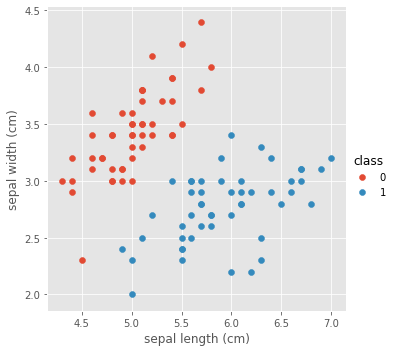

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
g = sns.FacetGrid(df, hue='class', size=5)
g.map(plt.scatter, "sepal length (cm)", "sepal width (cm)")
g.add_legend()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:2].values
y = df.iloc[:,4].values

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [8]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_std, y)

print(lr.coef_)
print(lr.intercept_)

[[ 9.87113623 -6.67376595]]
[1.7401565]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers =('s', 'x', 'o', '^', 'v')
    colors = ('red', "blue",' lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors [ : len (np.unique(y))])

    # plot the decision surface
    x1_min, x1_max= X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array( [xx1.ravel(), xx2. ravel()]).T)
    Z = Z. reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors [idx],
                        marker=markers [idx],
                        label=cl,
                        edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test [:, 0],
                        X_test [:, 1],
                        C=' ',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        S=100,
                        label='test set ')

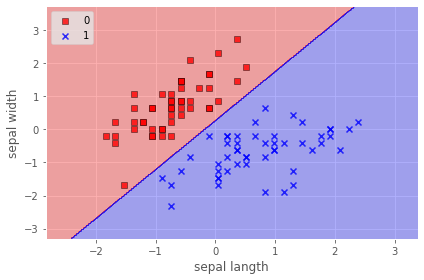

In [31]:
plot_decision_regions(X_std,y,classifier=lr)
plt.xlabel('sepal langth')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()